#Assignment 2


Alaa Hisham Mahmoud Mohamed Ismail  52-23873 <br>
Abdulrahman Fahmy Bayoumi Abu-Tur   52-14137 <br>
Boles Waheed Shawky Boles           52-22774 <br>
Ahmed Hussein Omar  52-13398


In [ ]:
!pip install numpy pillow matplotlib

!wget -O image0.png 'https://networkcameratech.com/wp-content/uploads/2016/10/HIKVISION-DS-2CD2142FWD-I_2016-Nov-09_21_59_05.png'
!wget -O image1.png 'https://networkcameratech.com/wp-content/uploads/2016/10/HIKVISION-DS-2CD2142FWD-I_2016-Nov-09_21_52_01.png'
!wget -O image2.png 'https://networkcameratech.com/wp-content/uploads/2016/10/AXISP3364_2016-Oct-27_03_50_22.png'
!wget -O image3.png 'd'

--2024-12-03 13:40:23--  https://networkcameratech.com/wp-content/uploads/2016/10/HIKVISION-DS-2CD2142FWD-I_2016-Nov-09_21_59_05.png
Resolving networkcameratech.com (networkcameratech.com)... 54.157.250.197
Connecting to networkcameratech.com (networkcameratech.com)|54.157.250.197|:443... failed: Connection timed out.
Retrying.

--2024-12-03 13:42:33--  (try: 2)  https://networkcameratech.com/wp-content/uploads/2016/10/HIKVISION-DS-2CD2142FWD-I_2016-Nov-09_21_59_05.png
Connecting to networkcameratech.com (networkcameratech.com)|54.157.250.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1561813 (1.5M) [image/png]
Saving to: ‘image0.png’

image0.png          100%[===================>]   1.49M  3.57MB/s    in 0.4s    

2024-12-03 13:43:38 (3.57 MB/s) - ‘image0.png’ saved [1561813/1561813]

--2024-12-03 13:43:38--  https://networkcameratech.com/wp-content/uploads/2016/10/HIKVISION-DS-2CD2142FWD-I_2016-Nov-09_21_52_01.png
Resolving networkcameratech.com (networ

In [ ]:
import numpy as np
from PIL import Image

# np.set_printoptions(suppress=True)


In [ ]:
# x middle row = 0
# -1 -1 -1
#  0  0  0
#  1  1  1
# y middle column = 0
# -1 0 1
# -1 0 1
# -1 0 1

def get_kernels(size):
    kernel_x = np.zeros((size, size))
    kernel_y = np.zeros((size, size))

    kernel_x[:size // 2, :] = -1  # Top half
    kernel_x[size // 2 + 1:, :] = 1  # Bottom half

    kernel_y[:, :size // 2] = -1  # Left half
    kernel_y[:, size // 2 + 1:] = 1  # Right half

    return kernel_x, kernel_y


In [ ]:
# Function to apply convolution
def apply_convolution(image, kernel):
  img_array = np.array(image, dtype=np.float32)
  kernel_size = kernel.shape[0]
  # Output image with same shape as input
  output = np.zeros_like(img_array)
  # Convolution process (skipping edges)
  for i in range(kernel_size // 2, img_array.shape[0] - kernel_size // 2):
    for j in range(kernel_size // 2, img_array.shape[1] - kernel_size // 2):
      region = img_array[i - kernel_size // 2:i + kernel_size // 2 + 1, j - kernel_size // 2:j + kernel_size // 2 + 1]
      output[i, j] = np.sum(region * kernel)

  return output


In [ ]:
def process_image(image, max_kernel_size, threshold):
    image = image.convert('L')  # Convert to grayscale
    img_array = np.array(image)

    magnitude_map = np.zeros_like(img_array, dtype=np.float32)
    kernel_size_map = np.zeros_like(img_array, dtype=np.float32)

    for size in range(3, max_kernel_size + 1 , 2):  # Iterate over odd sizes
        kernel_x, kernel_y = get_kernels(size)
        grad_x = apply_convolution(image, kernel_x)
        grad_y = apply_convolution(image, kernel_y)

        # Calculate magnitude
        magnitude = np.sqrt(grad_x ** 2 + grad_y ** 2) / (size ** 2)

        # Update the maps where the new magnitude is larger than the existing one
        update_mask = magnitude > magnitude_map
        magnitude_map[update_mask] = magnitude[update_mask]
        kernel_size_map[update_mask] = size

    # Apply threshold
    magnitude_map[magnitude_map < threshold] = 0
    kernel_size_map[magnitude_map < threshold] = 0

    return magnitude_map, kernel_size_map


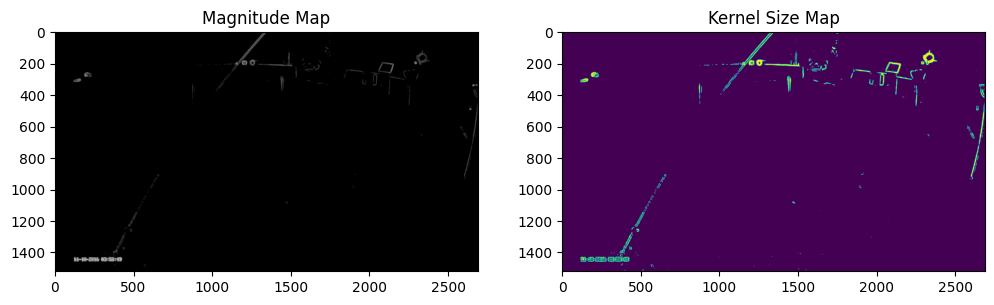

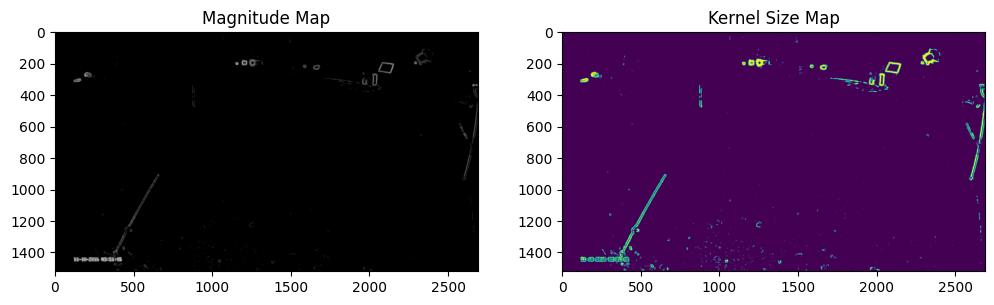

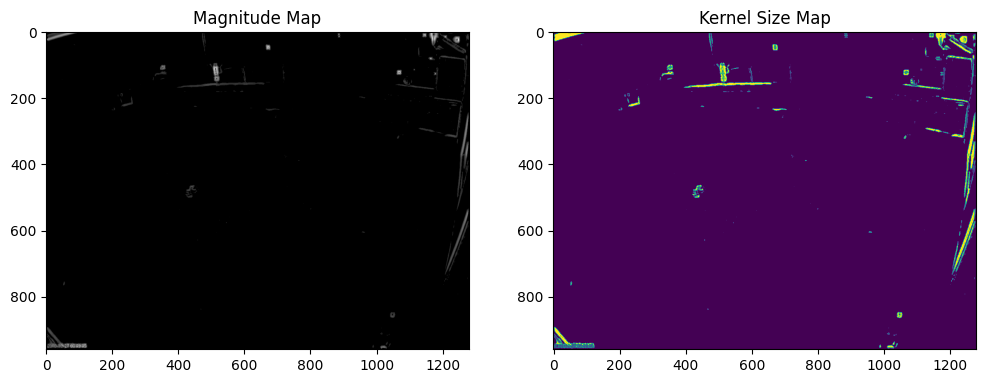

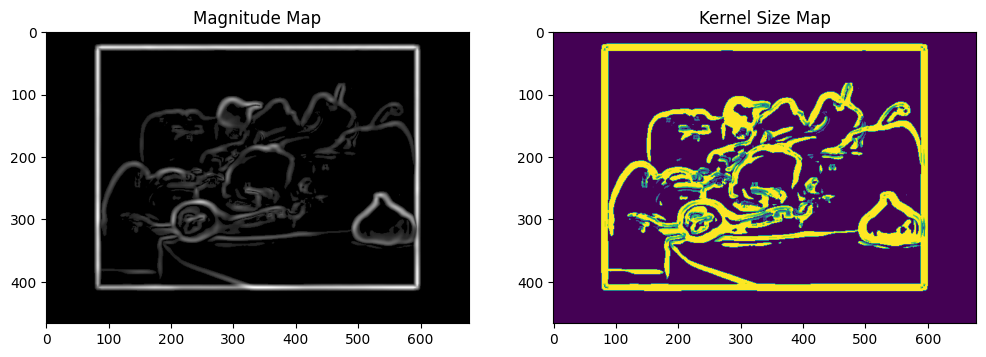

In [46]:
import matplotlib.pyplot as plt

def main(image, max_kernel_size, threshold):
  image = Image.open(f'/content/image{i}.png')
  magnitude_map, kernel_size_map = process_image(image, max_kernel_size, threshold)

  # Display results
  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.title('Magnitude Map')
  plt.imshow(magnitude_map, cmap='gray')

  plt.subplot(1, 2, 2)
  plt.title('Kernel Size Map')
  plt.imshow(kernel_size_map, cmap='viridis')

  plt.show()


## Main
max_kernel_size = 13 # <--- write the wanted max_kernel_size here
threshold = 13 # <--- write the wanted threshold here

# Loop over the 4 images (Note that this will take some )
for i in range(4):
  main(i, max_kernel_size, threshold)